***
# COVID-19 Vaccination Progress
****

+ Country - this is the country for which the vaccination information is provided
+ Country ISO Code - ISO code for the country;
+ Date- date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
+ Total number of vaccin ations - this is the absolute number of total immunizations in the country;
+ Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
+ Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
+ Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country; ONLY CHANGE COMPARED TO PREVIOUS DAY!!!
+ Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
+ Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
+ Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
+ Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
+ Number of vaccinations per day - number of daily vaccination for that day and country;
+ Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
+ Vaccines used in the country - total number of vaccines used in the country (up to date);
+ Source name - source of the information (national authority, international organization, local organization etc.);
+ Source website - website of the source of information;

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileRepor
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
import seaborn as sns
#import altair as alt
from scipy import stats
import statsmodels.formula.api as smf

%matplotlib inline
dpi_var=150
bbox_inches_var='tight'

In [2]:
# Read in vaccination data
df = pd.read_csv('data/country_vaccinations.csv')

In [3]:
df.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              8079 non-null   object 
 1   iso_code                             8079 non-null   object 
 2   date                                 8079 non-null   object 
 3   total_vaccinations                   4984 non-null   float64
 4   people_vaccinated                    4423 non-null   float64
 5   people_fully_vaccinated              3021 non-null   float64
 6   daily_vaccinations_raw               4192 non-null   float64
 7   daily_vaccinations                   7891 non-null   float64
 8   total_vaccinations_per_hundred       4984 non-null   float64
 9   people_vaccinated_per_hundred        4423 non-null   float64
 10  people_fully_vaccinated_per_hundred  3021 non-null   float64
 11  daily_vaccinations_per_million

In [5]:
df['date'] =  pd.to_datetime(df['date'])

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_vaccinations,4984.0,2.597915e+06,9.383280e+06,0.0,40451.75,276962.00,1.303350e+06,1.304739e+08
people_vaccinated,4423.0,2.073454e+06,6.824277e+06,0.0,36779.50,249555.00,1.007708e+06,8.547217e+07
people_fully_vaccinated,3021.0,8.933775e+05,3.595095e+06,1.0,19019.00,111716.00,4.889370e+05,4.636552e+07
daily_vaccinations_raw,4192.0,9.203405e+04,2.895602e+05,0.0,2738.00,13838.50,5.670225e+04,4.575496e+06
daily_vaccinations,7891.0,6.096775e+04,2.139143e+05,1.0,1025.50,6161.00,2.779400e+04,2.541597e+06
total_vaccinations_per_hundred,4984.0,1.000678e+01,1.785035e+01,0.0,0.79,3.77,1.101250e+01,1.620200e+02
people_vaccinated_per_hundred,4423.0,7.674486e+00,1.207422e+01,0.0,0.81,3.21,8.590000e+00,8.973000e+01
people_fully_vaccinated_per_hundred,3021.0,3.656931e+00,7.819018e+00,0.0,0.41,1.50,3.250000e+00,7.229000e+01
daily_vaccinations_per_million,7891.0,2.698878e+03,4.162911e+03,0.0,363.00,1305.00,3.211000e+03,5.426400e+04


In [7]:
#print(df.daily_vaccinations_raw.unique(), df.daily_vaccinations_raw.nunique()) 

In [8]:
#print(df.iso_code.unique(), df.iso_code.nunique())

In [9]:
#print(df.country.unique(), df.country.nunique())

In [10]:
#print(df.source_name.unique(), df.source_name.nunique())

In [11]:
#print(df.source_website.unique(), df.source_website.nunique())

In [12]:
#print(df.vaccines.unique(), df.vaccines.nunique())

In [13]:
df[df.duplicated(subset=['country','date'], keep=False)].shape

(0, 15)

In [14]:
lst = ['iso_code', 'daily_vaccinations_raw', 'source_name', 'source_website']
df.drop(lst, 1, inplace=True)
df.head(3)

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca
1,Afghanistan,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca


In [15]:
lst2 = ['England', 'Scotland', 'Wales', 'Northern Ireland']
check1 = df.loc[df['country'].isin(lst2)].loc[df['date'] == '2021-03-15'].loc[:, 'daily_vaccinations'].sum()
check2 = df.loc[df['country'] == 'United Kingdom'].loc[df['date'] == '2021-03-15'].loc[:, 'daily_vaccinations'].values[0]
print(f'The sum of daily vaccinations in England, Scotland, Wales and Nothern Ireland on 15th March 2021 was: {check1}')
print(f'The total daily vaccinations in the United Kingdom on 15th March 2021 was: {check2}')

The sum of daily vaccinations in England, Scotland, Wales and Nothern Ireland on 15th March 2021 was: 389942.0
The total daily vaccinations in the United Kingdom on 15th March 2021 was: 389942.0


In [16]:
df = df[df.country.apply(lambda x: x not in ['England', 'Scotland', 'Wales', 'Northern Ireland'])]

In [17]:
df.shape[0]

7675

In [18]:
df.isnull().sum(axis = 0)

country                                   0
date                                      0
total_vaccinations                     2996
people_vaccinated                      3557
people_fully_vaccinated                4947
daily_vaccinations                      184
total_vaccinations_per_hundred         2996
people_vaccinated_per_hundred          3557
people_fully_vaccinated_per_hundred    4947
daily_vaccinations_per_million          184
vaccines                                  0
dtype: int64

In [19]:
#df.vaccines.unique()

In [20]:
df3 = df.drop('vaccines', axis=1).join(df['vaccines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('vaccines'))
df4 = df3[['country', 'date', 'vaccines']]
df4.head()

,country,date,vaccines
0,Afghanistan,2021-02-22,Oxford/AstraZeneca
1,Afghanistan,2021-02-23,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,Oxford/AstraZeneca
3,Afghanistan,2021-02-25,Oxford/AstraZeneca
4,Afghanistan,2021-02-26,Oxford/AstraZeneca


In [21]:
df5 = df4.pivot(index=['country', 'date'], columns='vaccines', values='vaccines').reset_index()
df5.head()

vaccines,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V
0,Afghanistan,2021-02-22,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN


In [22]:
#df5.columns

In [23]:
lst_ = ['country', 'date', 'vaccines']
df.drop(lst_, 1, inplace=True)
df.head(3)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [24]:
df6 = df5.join(df)
df6.head(3)

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,2021-02-22,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


## NEXT:
+ convert vaccine columns to bool
+ check if we can group countries
+ tidy up and comment code so far
+ reading up on domain knowledge, e.g. brief info per vaccine

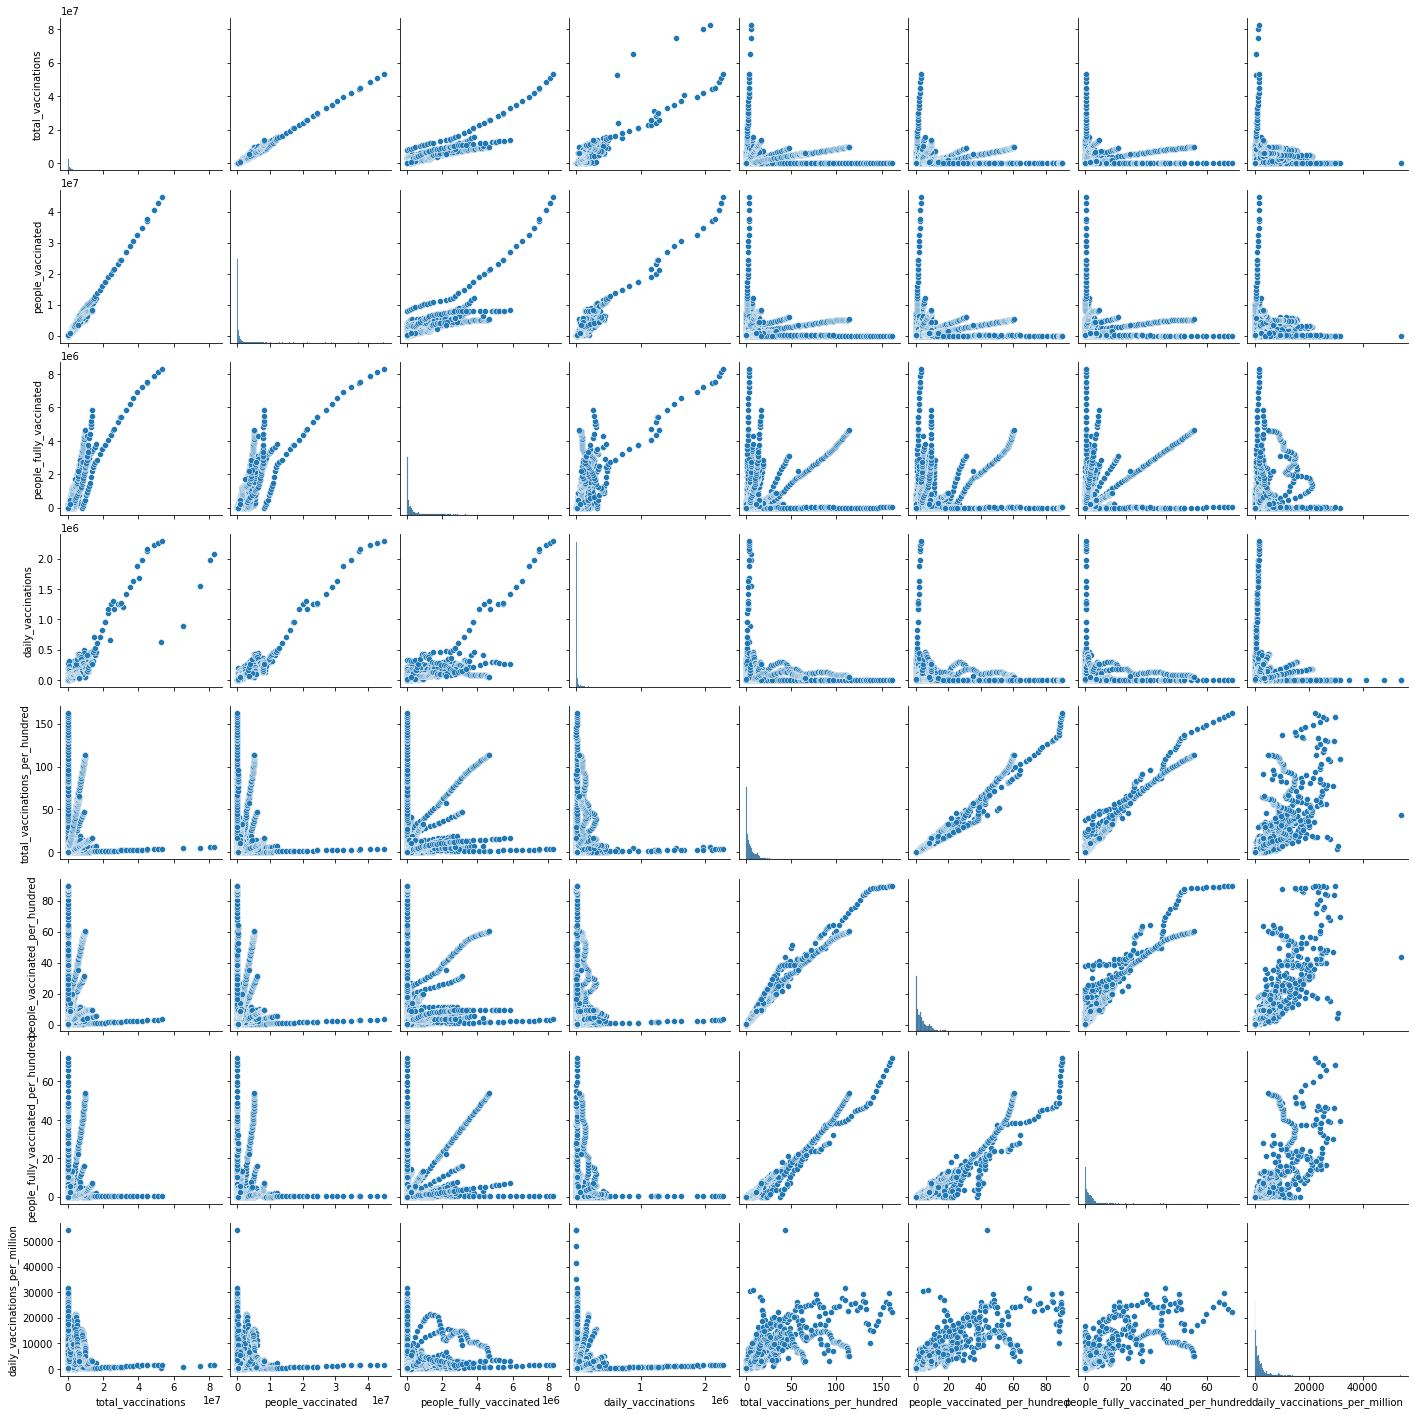

In [25]:
sns.pairplot(data=df6)